In [333]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

pd.set_option("display.max_columns",None)
df = pd.read_csv("C:/Users/ahmet/pandas/Automobile_Loan.csv")
df_al = df.copy()

In [235]:
df_al

,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,Client_Income_Type,Client_Education,Client_Marital_Status,Client_Gender,Loan_Contract_Type,Client_Housing_Type,Population_Region_Relative,Age_Days,Employed_Days,Registration_Days,ID_Days,Own_House_Age,Mobile_Tag,Homephone_Tag,Workphone_Working,Client_Occupation,Client_Family_Members,Cleint_City_Rating,Application_Process_Day,Application_Process_Hour,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_1,Score_Source_2,Score_Source_3,Social_Circle_Default,Phone_Change,Credit_Bureau,Default
0,12142509,6750,0.0,0.0,1.0,0.0,0.0,61190.55,3416.85,Alone,Commercial,Secondary,M,Male,CL,Home,0.028663,13957,1062,6123,383,NaN,1,1,0,Sales,2.0,2.0,6.0,17.0,Yes,Yes,Self-employed,0.568066,0.478787,NaN,0.0186,63.0,NaN,0
1,12138936,20250,1.0,0.0,1.0,NaN,0.0,15282,1826.55,Alone,Service,Graduation,M,Male,CL,Home,0.008575,14162,4129,7833,21,0.0,1,0,1,NaN,2.0,2.0,3.0,10.0,Yes,Yes,Government,0.563360,0.215068,NaN,NaN,NaN,NaN,0
2,12181264,18000,0.0,0.0,1.0,0.0,1.0,59527.35,2788.2,Alone,Service,Graduation dropout,W,Male,CL,Family,0.0228,16790,5102,NaN,331,NaN,1,0,0,Realty agents,2.0,2.0,4.0,NaN,Yes,Yes,Self-employed,NaN,0.552795,0.329655,0.0742,277.0,0.0,0
3,12188929,15750,0.0,0.0,1.0,1.0,0.0,53870.4,2295.45,Alone,Retired,Secondary,M,Male,CL,Home,0.010556,23195,365243,NaN,775,NaN,1,0,0,NaN,2.0,3.0,2.0,15.0,Yes,Yes,XNA,NaN,0.135182,0.631355,NaN,1700.0,3.0,0
4,12133385,33750,1.0,0.0,1.0,0.0,2.0,133988.4,3547.35,Alone,Commercial,Secondary,M,Female,CL,Home,0.020713,11366,2977,5516,4043,6.0,1,0,0,Laborers,4.0,1.0,3.0,NaN,Yes,Yes,Business Entity Type 3,0.508199,0.301182,0.355639,0.2021,674.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121851,12207714,29250,0.0,0.0,NaN,1.0,0.0,107820,3165.3,Relative,Service,Secondary,M,Female,CL,Home,0.031329,12889.0,2863.0,2661.0,2943.0,NaN,1,0,0,Laborers,2.0,2.0,4.0,16.0,Yes,No,Business Entity Type 2,NaN,0.173527,0.184116,0.0577,0.0,1.0,1
121852,12173765,15750,0.0,1.0,1.0,0.0,0.0,104256,3388.05,Alone,Commercial,Graduation,M,Female,CL,Home,0.018209,8648.0,636.0,902.0,1209.0,NaN,1,1,0,Sales,2.0,3.0,4.0,12.0,Yes,Yes,Self-employed,NaN,0.371559,0.406617,0.0825,4.0,0.0,0
121853,12103937,8100,0.0,1.0,0.0,1.0,1.0,55107.9,2989.35,Alone,Govt Job,Secondary,M,Male,CL,Home,0.008068,9152.0,1623.0,3980.0,353.0,NaN,1,0,0,High skill tech,3.0,3.0,5.0,11.0,No,No,Trade: type 6,0.169049,0.048079,NaN,NaN,0.0,NaN,0
121854,12170623,38250,1.0,1.0,0.0,1.0,0.0,45000,2719.35,Alone,Service,Graduation,M,Female,CL,Home,0.028663,10290.0,847.0,895.0,2902.0,4.0,1,0,0,Sales,2.0,2.0,1.0,12.0,Yes,Yes,Business Entity Type 3,0.182737,0.103538,0.077499,0.0979,0.0,2.0,0


Text(0.5, 1.0, 'Correlation Matrix')

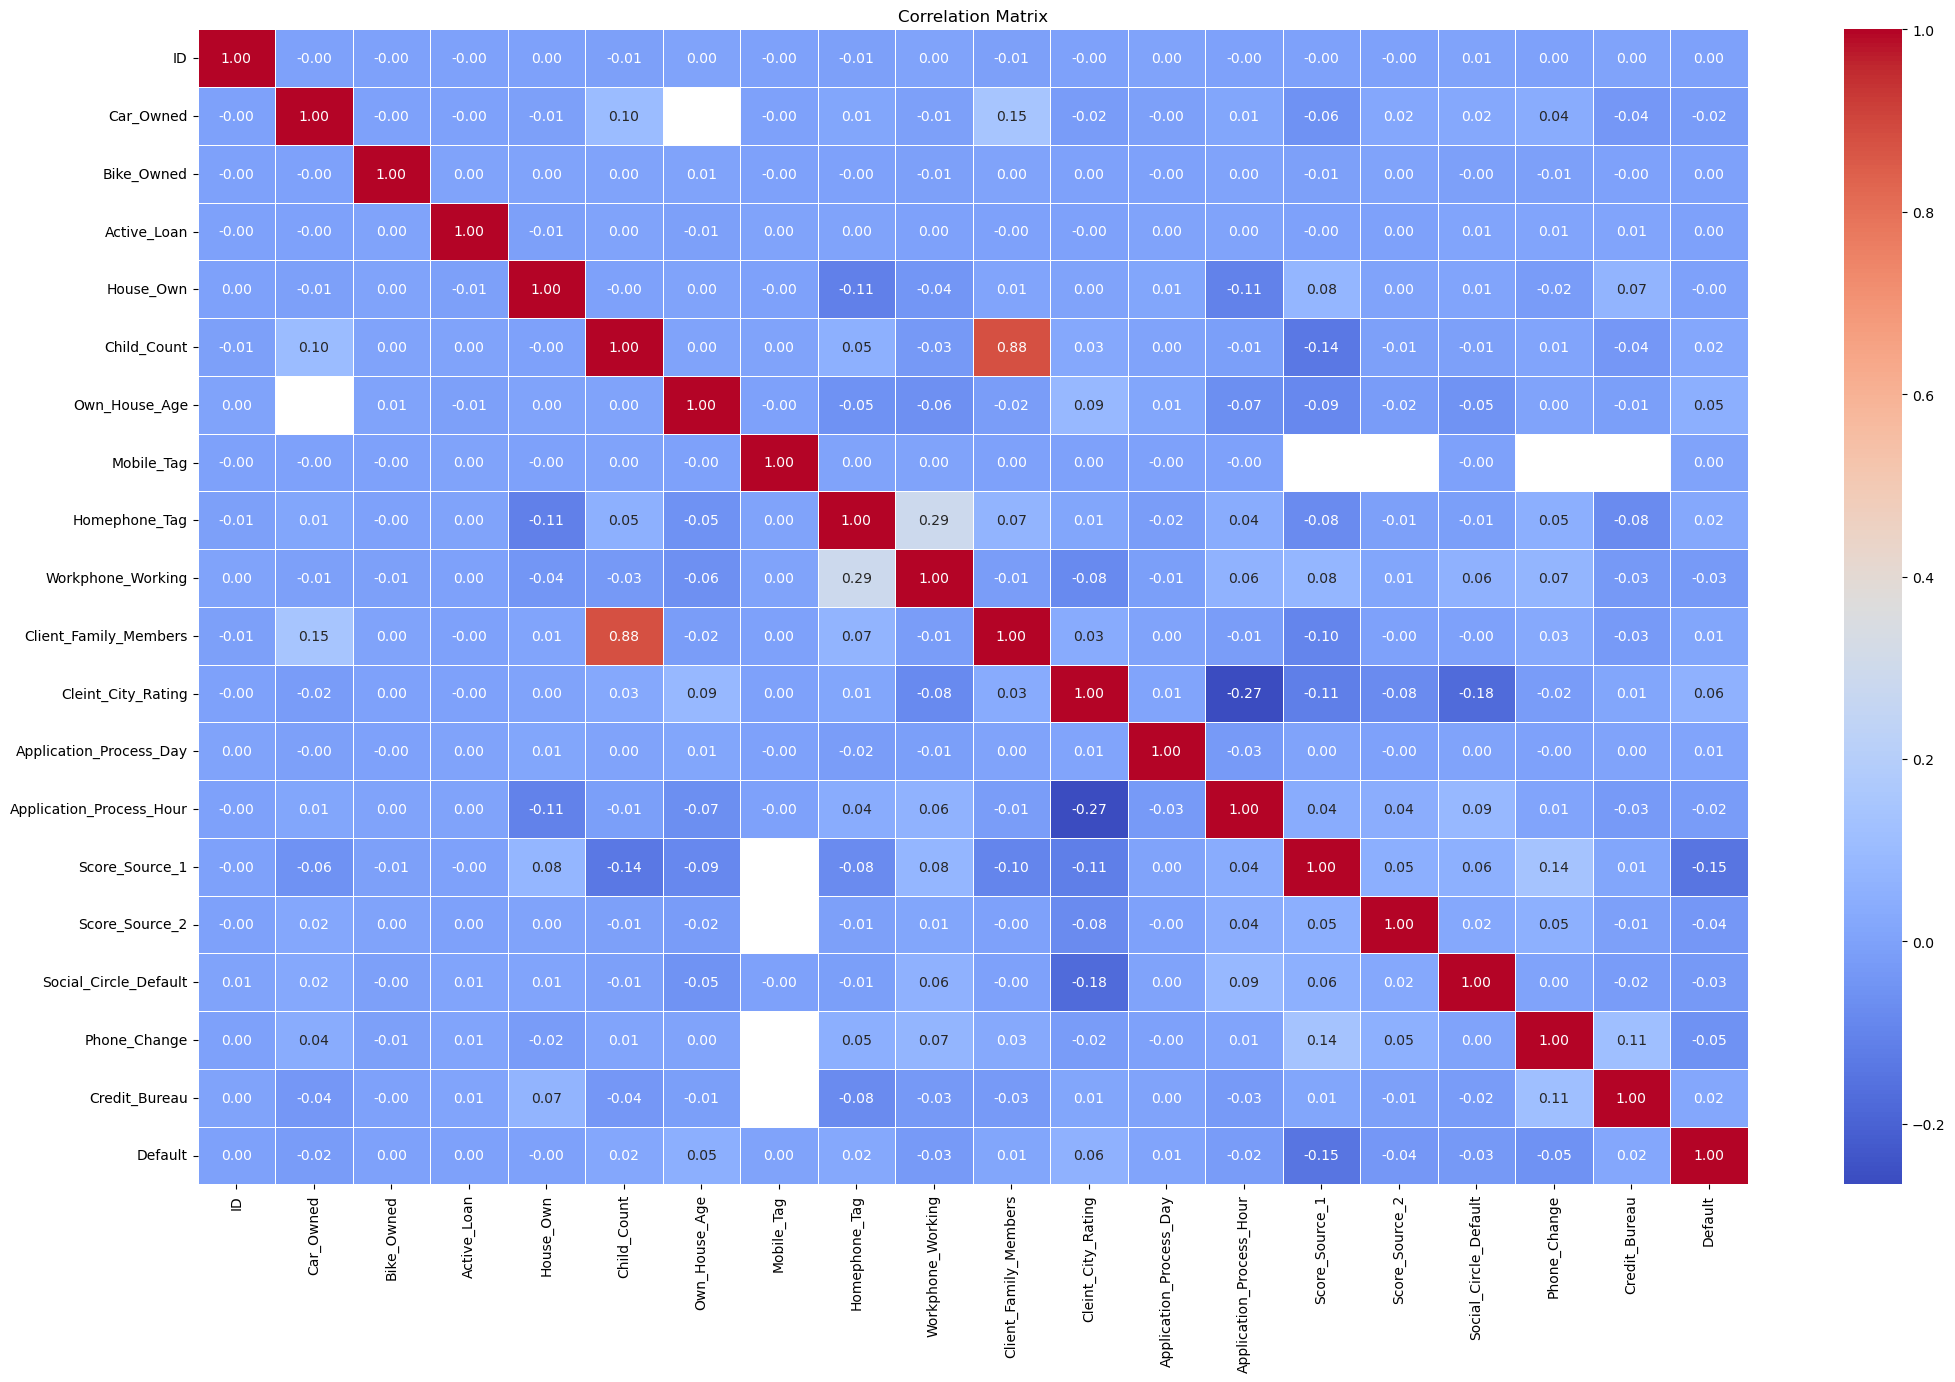

In [236]:
variables = df_al.columns
data = df_al[variables]
correlation_matrix = data.corr()
plt.figure(figsize=(25, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')

In [237]:
df_al.drop("ID",axis=1,inplace=True)

In [238]:
df_al.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121856 entries, 0 to 121855
Data columns (total 39 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Client_Income               118249 non-null  object 
 1   Car_Owned                   118275 non-null  float64
 2   Bike_Owned                  118232 non-null  float64
 3   Active_Loan                 118221 non-null  float64
 4   House_Own                   118195 non-null  float64
 5   Child_Count                 118218 non-null  float64
 6   Credit_Amount               118224 non-null  object 
 7   Loan_Annuity                117044 non-null  object 
 8   Accompany_Client            120110 non-null  object 
 9   Client_Income_Type          118155 non-null  object 
 10  Client_Education            118211 non-null  object 
 11  Client_Marital_Status       118383 non-null  object 
 12  Client_Gender               119443 non-null  object 
 13  Loan_Contract_

In [334]:
df_al.isnull().mean()*100

ID                             0.000000
Client_Income                  2.960051
Car_Owned                      2.938715
Bike_Owned                     2.974002
Active_Loan                    2.983029
House_Own                      3.004366
Child_Count                    2.985491
Credit_Amount                  2.980567
Loan_Annuity                   3.948923
Accompany_Client               1.432839
Client_Income_Type             3.037191
Client_Education               2.991236
Client_Marital_Status          2.850085
Client_Gender                  1.980206
Loan_Contract_Type             2.996159
Client_Housing_Type            3.025702
Population_Region_Relative     3.985852
Age_Days                       2.954307
Employed_Days                  2.994518
Registration_Days              2.965796
ID_Days                        4.897584
Own_House_Age                 65.729221
Mobile_Tag                     0.000000
Homephone_Tag                  0.000000
Workphone_Working              0.000000


In [336]:
object_sutunlar = df_al.select_dtypes(include="object").columns
for col in object_sutunlar:
    print(df_al[col].value_counts())
    print("------------------")

13500       11908
11250       10302
15750        8719
18000        8215
9000         7577
            ...  
13005.0         1
11835.0         1
25026.3         1
12285.0         1
12840.75        1
Name: Client_Income, Length: 1516, dtype: int64
------------------
45000.0      2513
67500.0      2340
22500.0      2090
27000.0      1865
18000.0      1847
             ... 
126149.85       1
41040           1
201213.9        1
71174.7         1
135534.6        1
Name: Credit_Amount, Length: 6816, dtype: int64
------------------
900        1885
1350       1684
675         682
1012.5      622
3780        504
           ... 
6178.95       1
1148.4        1
2736.9        1
1109.7        1
2989.35       1
Name: Loan_Annuity, Length: 16680, dtype: int64
------------------
Alone       97409
Relative    15748
Partner      4516
Kids         1334
Others        987
Group         104
##             12
Name: Accompany_Client, dtype: int64
------------------
Service            61028
Commercial         2

In [241]:
df_al.Accompany_Client = df_al.Accompany_Client.replace('#','').replace('',np.nan)

In [242]:
df_al.Population_Region_Relative = df_al.Population_Region_Relative.replace('@','').replace('',np.nan)
df_al.Population_Region_Relative = df_al.Population_Region_Relative.replace('#','').replace('',np.nan)
df_al.Population_Region_Relative = df_al.Population_Region_Relative.astype(float)

In [243]:
for value in df_al["Client_Income"]:
    if pd.notnull(value) and value<'0':
        print(value)

$
$
$
$
$


TypeError: '<' not supported between instances of 'float' and 'str'

In [244]:
df_al.Client_Income = df_al.Client_Income.replace('$', '').replace('', np.nan)
df_al.Client_Income = df_al.Client_Income.astype(float)

In [245]:
for value in df_al["Credit_Amount"]:
    if pd.notnull(value) and value<'0':
        print(value)

$
$


TypeError: '<' not supported between instances of 'float' and 'str'

In [246]:
df_al.Credit_Amount = df_al.Credit_Amount.replace('$', '').replace('', np.nan)
df_al.Credit_Amount = df_al.Credit_Amount.astype(float)

In [247]:
for value in df_al["Loan_Annuity"]:
    if pd.notnull(value) and value<'0':
        print(value)

$
#VALUE!
#VALUE!
#VALUE!
#VALUE!


TypeError: '<' not supported between instances of 'float' and 'str'

In [248]:
df_al.Loan_Annuity = df_al.Loan_Annuity.replace('$', '').replace('', np.nan)
df_al.Loan_Annuity = df_al.Loan_Annuity.replace('#VALUE!', '').replace('', np.nan)
df_al.Loan_Annuity = df_al.Loan_Annuity.astype(float)

In [249]:
for value in df_al["Accompany_Client"]:
    if pd.notnull(value) and value<'0':
        print(value)
        
df_al.Accompany_Client = df_al.Accompany_Client.replace('##', '').replace('', np.nan)
df_al.Accompany_Client.value_counts()

##
##
##
##
##
##
##
##
##
##
##
##


Alone       97409
Relative    15748
Partner      4516
Kids         1334
Others        987
Group         104
Name: Accompany_Client, dtype: int64

In [250]:
for value in df_al["Client_Gender"]:
    if pd.notnull(value) and value!='Male' and value!='Female':
        print(value)
        
df_al.Client_Gender = df_al.Client_Gender.replace('XNA', '').replace('', np.nan)
df_al.Client_Gender.value_counts()

XNA
XNA
XNA


Male      78463
Female    40977
Name: Client_Gender, dtype: int64

In [251]:
df_al.Population_Region_Relative = df_al.Population_Region_Relative.replace('@', '').replace('', np.nan)
df_al.Population_Region_Relative = df_al.Population_Region_Relative.replace('#', '').replace('', np.nan)
df_al.Population_Region_Relative = df_al.Population_Region_Relative.astype(float)

In [252]:
df_al.Age_Days = df_al.Age_Days.replace('x', '').replace('', np.nan)
df_al.Age_Days = df_al.Age_Days.astype(float)

In [253]:
df_al.Employed_Days = df_al.Employed_Days.replace('x', '').replace('', np.nan)
df_al.Employed_Days = df_al.Employed_Days.astype(float)

In [254]:
df_al.Registration_Days = df_al.Registration_Days.replace('x', '').replace('', np.nan)
df_al.Registration_Days = df_al.Registration_Days.astype(float)

In [255]:
df_al.ID_Days = df_al.ID_Days.replace('x', '').replace('', np.nan)
df_al.ID_Days = df_al.ID_Days.astype(float)

In [256]:
df_al.Type_Organization = df_al.Type_Organization.replace('XNA', '').replace('', np.nan)

In [257]:
df_al.Score_Source_3 = df_al.Score_Source_3.replace('&', '').replace('', np.nan)
df_al.Score_Source_3 = df_al.Score_Source_3.astype(float)

In [258]:
def fix_value_by_map(current_value, default, value_map):
    if str(current_value) == 'nan':
        return value_map[default]
    else:
        return current_value

In [259]:
value_map = df_al.groupby('Default').median()['Client_Income']
df_al['Client_Income'] = df_al.apply(lambda row : fix_value_by_map(row['Client_Income'], row['Default'], value_map), axis=1)

In [260]:
df_al.dropna(subset=['Credit_Amount'], inplace = True)

In [261]:
# Loan_Annuity sütununda yer alan boş veriler, Client_Income ve Default sütununda yer alan verilerin gruplandırılmasıyla doldurulmaktadır.
# 

value_map = df_al.groupby(['Client_Income','Default']).mean()['Loan_Annuity']

def get_Loan_Annuity_by_Client_Income_and_Default(loan_annuity, client_income, default, value_map):
    new_loan_annuity = loan_annuity
    if str(new_loan_annuity) == 'nan':
        for key in value_map.keys():
            if default == key[1]:
                if client_income < key[0]:
                    continue
                else:
                    new_loan_annuity = value_map[key]
                    break
            else:
                continue
    return new_loan_annuity
          
df_al['Loan_Annuity'] = df_al.apply(lambda row : 
                                    get_Loan_Annuity_by_Client_Income_and_Default(row['Loan_Annuity'], 
                                                                                    row['Client_Income'], row['Default'], 
                                                                                    value_map), axis=1)

In [262]:
from sklearn.preprocessing import LabelEncoder

df_al['Accompany_Client'].fillna(df_al['Accompany_Client'].mode()[0], inplace=True)

encoder = LabelEncoder()
df_al.Accompany_Client = encoder.fit_transform(df_al.Accompany_Client)

In [263]:
df_al[['Accompany_Client']].value_counts()

Accompany_Client
0                   96190
5                   15286
4                    4384
2                    1294
3                     966
1                      99
dtype: int64

In [264]:
df_al[['Client_Income_Type']] = df_al[['Client_Income_Type']].fillna("Unknown")

encoder = LabelEncoder()
df_al.Client_Income_Type = encoder.fit_transform(df_al.Client_Income_Type)

In [265]:
df_al[['Client_Income_Type']].value_counts()

Client_Income_Type
5                     59248
1                     26948
4                     20390
2                      8027
8                      3590
6                         7
7                         6
3                         2
0                         1
dtype: int64

In [266]:
df_al.Car_Owned.value_counts()

0.0    75381
1.0    39348
Name: Car_Owned, dtype: int64

In [267]:
df_al[['Car_Owned']] = df_al[['Car_Owned']].fillna(value=1)
df_al.Car_Owned.value_counts()

0.0    75381
1.0    42838
Name: Car_Owned, dtype: int64

In [268]:
df_al.Bike_Owned.value_counts()

0.0    76606
1.0    38093
Name: Bike_Owned, dtype: int64

In [269]:
df_al[['Bike_Owned']] = df_al[['Bike_Owned']].fillna(value=1)
df_al.Bike_Owned.value_counts()

0.0    76606
1.0    41613
Name: Bike_Owned, dtype: int64

In [270]:
df_al.Active_Loan.value_counts()

0.0    57445
1.0    57255
Name: Active_Loan, dtype: int64

In [271]:
df_al.Active_Loan = df_al.Active_Loan.fillna(value=0)
df_al.Active_Loan.value_counts()

0.0    60964
1.0    57255
Name: Active_Loan, dtype: int64

In [272]:
df_al.House_Own.value_counts()

1.0    79345
0.0    35328
Name: House_Own, dtype: int64

In [273]:
df_al.House_Own = df_al.House_Own.fillna(value=0)
df_al.House_Own.value_counts()

1.0    79345
0.0    38874
Name: House_Own, dtype: int64

In [274]:
df_al.Child_Count.value_counts()

0.0     80349
1.0     22747
2.0      9993
3.0      1376
4.0       161
5.0        33
6.0        11
7.0         4
14.0        4
10.0        3
8.0         2
19.0        1
12.0        1
9.0         1
Name: Child_Count, dtype: int64

In [275]:
df_al['Child_Count'].fillna(df_al['Child_Count'].mode()[0], inplace=True)
df_al.Child_Count.value_counts()

0.0     83882
1.0     22747
2.0      9993
3.0      1376
4.0       161
5.0        33
6.0        11
7.0         4
14.0        4
10.0        3
8.0         2
19.0        1
12.0        1
9.0         1
Name: Child_Count, dtype: int64

In [276]:
df_al.Client_Education.value_counts()

Secondary             81421
Graduation            27942
Graduation dropout     3828
Junior secondary       1411
Post Grad                64
Name: Client_Education, dtype: int64

In [277]:
df_al['Client_Education'].fillna(df_al['Client_Education'].mode()[0], inplace=True)

encoder = LabelEncoder()
df_al.Client_Education = encoder.fit_transform(df_al.Client_Education)
df_al.Client_Education.value_counts()

4    84974
0    27942
1     3828
2     1411
3       64
Name: Client_Education, dtype: int64

In [278]:
df_al.Client_Marital_Status.value_counts()

M    84753
S    16861
D     7337
W     5892
Name: Client_Marital_Status, dtype: int64

In [279]:
df_al[['Client_Marital_Status']] = df_al[['Client_Marital_Status']].fillna(value='Other')

encoder = LabelEncoder()
df_al.Client_Marital_Status = encoder.fit_transform(df_al.Client_Marital_Status)
df_al.Client_Marital_Status.value_counts()

1    84753
3    16861
0     7337
4     5892
2     3376
Name: Client_Marital_Status, dtype: int64

In [280]:
df_al.Client_Gender.value_counts()

Male      76149
Female    39744
Name: Client_Gender, dtype: int64

In [281]:
df_al[['Client_Gender']] = df_al[['Client_Gender']].fillna(value='Unknown')

encoder = LabelEncoder()
df_al.Client_Gender = encoder.fit_transform(df_al.Client_Gender)
df_al.Client_Gender.value_counts()

1    76149
0    39744
2     2326
Name: Client_Gender, dtype: int64

In [282]:
df_al.Loan_Contract_Type.value_counts()

CL    103900
RL     10782
Name: Loan_Contract_Type, dtype: int64

In [283]:
df_al[['Loan_Contract_Type']] = df_al[['Loan_Contract_Type']].fillna(value='Other')

encoder = LabelEncoder()
df_al.Loan_Contract_Type = encoder.fit_transform(df_al.Loan_Contract_Type)
df_al.Loan_Contract_Type.value_counts()

0    103900
2     10782
1      3537
Name: Loan_Contract_Type, dtype: int64

In [284]:
df_al.Client_Housing_Type.value_counts()

Home         101771
Family         5598
Municipal      4107
Rental         1758
Office          973
Shared          433
Name: Client_Housing_Type, dtype: int64

In [285]:
df_al[['Client_Housing_Type']] = df_al[['Client_Housing_Type']].fillna(value='Other')

encoder = LabelEncoder()
df_al.Client_Housing_Type = encoder.fit_transform(df_al.Client_Housing_Type)
df_al.Client_Housing_Type.value_counts()

1    101771
0      5598
2      4107
4      3579
5      1758
3       973
6       433
Name: Client_Housing_Type, dtype: int64

In [286]:
value_map = df_al.groupby('Default').median()['Age_Days']
df_al['Age_Days'] = df_al.apply(lambda row : fix_value_by_map(row['Age_Days'], row['Default'], value_map), axis=1)

In [287]:
value_map = df_al.groupby('Default').median()['Employed_Days']
df_al['Employed_Days'] = df_al.apply(lambda row : fix_value_by_map(row['Employed_Days'], row['Default'], value_map), axis=1)

In [288]:
value_map = df_al.groupby('Default').median()['Registration_Days']
df_al['Registration_Days'] = df_al.apply(lambda row : fix_value_by_map(row['Registration_Days'], row['Default'], value_map), axis=1)

In [289]:
value_map = df_al.groupby('Default').median()['ID_Days']
df_al['ID_Days'] = df_al.apply(lambda row : fix_value_by_map(row['ID_Days'], row['Default'], value_map), axis=1)

In [290]:
df_al.Client_Occupation.value_counts()

Laborers              20425
Sales                 11763
Core                  10310
Managers               7857
Drivers                6932
High skill tech        4195
Accountants            3640
Medicine               3067
Security               2614
Cooking                2170
Cleaning               1685
Private service         973
Low-skill Laborers      760
Secretaries             518
Waiters/barmen          492
Realty agents           273
HR                      202
IT                      184
Name: Client_Occupation, dtype: int64

In [291]:
df_al['Client_Occupation'].fillna(value='Other')

encoder = LabelEncoder()
df_al.Client_Occupation = encoder.fit_transform(df_al.Client_Occupation)
df_al.Client_Occupation.value_counts()

18    40159
8     20425
14    11763
3     10310
10     7857
4      6932
6      4195
0      3640
11     3067
16     2614
2      2170
1      1685
12      973
9       760
15      518
17      492
13      273
5       202
7       184
Name: Client_Occupation, dtype: int64

In [292]:
encoder = LabelEncoder()
df_al.Client_Permanent_Match_Tag = encoder.fit_transform(df_al.Client_Permanent_Match_Tag)  
df_al.Client_Permanent_Match_Tag.unique()

array([1, 0])

In [293]:
df_al.Client_Family_Members.value_counts()

2.0     59812
1.0     25421
3.0     19861
4.0      9298
5.0      1300
6.0       152
7.0        31
8.0        10
9.0         4
10.0        3
12.0        3
16.0        2
13.0        1
14.0        1
15.0        1
Name: Client_Family_Members, dtype: int64

In [294]:
df_al.Client_Family_Members.fillna(value=0.0,inplace=True)

In [295]:
value_map = df_al.groupby('Default').median()['Cleint_City_Rating']
df_al['Cleint_City_Rating'] = df_al.apply(lambda row : fix_value_by_map(row['Cleint_City_Rating'], row['Default'], value_map), axis=1)

In [296]:
value_map = df_al.groupby('Default').median()['Application_Process_Day']
df_al['Application_Process_Day'] = df_al.apply(lambda row : fix_value_by_map(row['Application_Process_Day'], row['Default'], value_map), axis=1)

In [297]:
value_map = df_al.groupby('Default').median()['Application_Process_Hour']
df_al['Application_Process_Hour'] = df_al.apply(lambda row : fix_value_by_map(row['Application_Process_Hour'], row['Default'], value_map), axis=1)

In [298]:
encoder = LabelEncoder()
df_al.Client_Contact_Work_Tag = encoder.fit_transform(df_al.Client_Contact_Work_Tag)
df_al.Client_Contact_Work_Tag.value_counts()

1    96980
0    21239
Name: Client_Contact_Work_Tag, dtype: int64

In [299]:
df_al.Type_Organization.unique()

def get_sector(organization_plus_type_value):
    return str(organization_plus_type_value).lower().split('type')[0]

def get_sector_type(organization_plus_type_value):
    try:
        return int(str(organization_plus_type_value).lower().split('type')[1])
    except:
        return 0

In [300]:
df_al['Employment_Sector'] = df_al.apply(lambda row : get_sector(row['Type_Organization']), axis=1)
df_al['Employment_Sector_Type'] = df_al.apply(lambda row : get_sector_type(row['Type_Organization']), axis=1)
df_al.drop(['Type_Organization'], inplace=True, axis=1)

In [301]:
encoder = LabelEncoder()
df_al['Employment_Sector'] = encoder.fit_transform(df_al['Employment_Sector'])

In [302]:
value_map = df_al.groupby('Default').median()['Score_Source_1']
df_al['Score_Source_1'] = df_al.apply(lambda row : fix_value_by_map(row['Score_Source_1'], row['Default'], value_map), axis=1)

In [303]:
value_map = df_al.groupby('Default').median()['Score_Source_2']
df_al['Score_Source_2'] = df_al.apply(lambda row : fix_value_by_map(row['Score_Source_2'], row['Default'], value_map), axis=1)

In [304]:
value_map = df_al.groupby('Default').median()['Score_Source_3']
df_al['Score_Source_3'] = df_al.apply(lambda row : fix_value_by_map(row['Score_Source_3'], row['Default'], value_map), axis=1)

In [305]:
value_map = df_al.groupby('Default').mean()['Social_Circle_Default']
df_al['Social_Circle_Default'] = df_al.apply(lambda row : fix_value_by_map(row['Social_Circle_Default'], row['Default'], value_map), axis=1)

In [306]:
value_map = df_al.groupby('Default').median()['Phone_Change']
df_al['Phone_Change'] = df_al.apply(lambda row : fix_value_by_map(row['Phone_Change'], row['Default'], value_map), axis=1)

In [307]:
value_map = df_al.groupby('Default').median()['Credit_Bureau']
df_al['Credit_Bureau'] = df_al.apply(lambda row : fix_value_by_map(row['Credit_Bureau'], row['Default'], value_map), axis=1)

In [308]:
df_al.dtypes

Client_Income                 float64
Car_Owned                     float64
Bike_Owned                    float64
Active_Loan                   float64
House_Own                     float64
Child_Count                   float64
Credit_Amount                 float64
Loan_Annuity                  float64
Accompany_Client                int32
Client_Income_Type              int32
Client_Education                int32
Client_Marital_Status           int32
Client_Gender                   int32
Loan_Contract_Type              int32
Client_Housing_Type             int32
Population_Region_Relative    float64
Age_Days                      float64
Employed_Days                 float64
Registration_Days             float64
ID_Days                       float64
Own_House_Age                 float64
Mobile_Tag                      int64
Homephone_Tag                   int64
Workphone_Working               int64
Client_Occupation               int32
Client_Family_Members         float64
Cleint_City_

In [309]:
df_al.isnull().sum()

Client_Income                     0
Car_Owned                         0
Bike_Owned                        0
Active_Loan                       0
House_Own                         0
Child_Count                       0
Credit_Amount                     0
Loan_Annuity                      0
Accompany_Client                  0
Client_Income_Type                0
Client_Education                  0
Client_Marital_Status             0
Client_Gender                     0
Loan_Contract_Type                0
Client_Housing_Type               0
Population_Region_Relative     4707
Age_Days                          0
Employed_Days                     0
Registration_Days                 0
ID_Days                           0
Own_House_Age                 77694
Mobile_Tag                        0
Homephone_Tag                     0
Workphone_Working                 0
Client_Occupation                 0
Client_Family_Members             0
Cleint_City_Rating                0
Application_Process_Day     

In [310]:
df_al.drop('Own_House_Age',axis=1,inplace=True)

In [311]:
df_al.Population_Region_Relative.info()

<class 'pandas.core.series.Series'>
Int64Index: 118219 entries, 0 to 121855
Series name: Population_Region_Relative
Non-Null Count   Dtype  
--------------   -----  
113512 non-null  float64
dtypes: float64(1)
memory usage: 1.8 MB


In [312]:
encoder = LabelEncoder()
df_al.Population_Region_Relative = encoder.fit_transform(df_al.Population_Region_Relative)

In [313]:
df_al.isnull().sum()

Client_Income                 0
Car_Owned                     0
Bike_Owned                    0
Active_Loan                   0
House_Own                     0
Child_Count                   0
Credit_Amount                 0
Loan_Annuity                  0
Accompany_Client              0
Client_Income_Type            0
Client_Education              0
Client_Marital_Status         0
Client_Gender                 0
Loan_Contract_Type            0
Client_Housing_Type           0
Population_Region_Relative    0
Age_Days                      0
Employed_Days                 0
Registration_Days             0
ID_Days                       0
Mobile_Tag                    0
Homephone_Tag                 0
Workphone_Working             0
Client_Occupation             0
Client_Family_Members         0
Cleint_City_Rating            0
Application_Process_Day       0
Application_Process_Hour      0
Client_Permanent_Match_Tag    0
Client_Contact_Work_Tag       0
Score_Source_1                0
Score_So

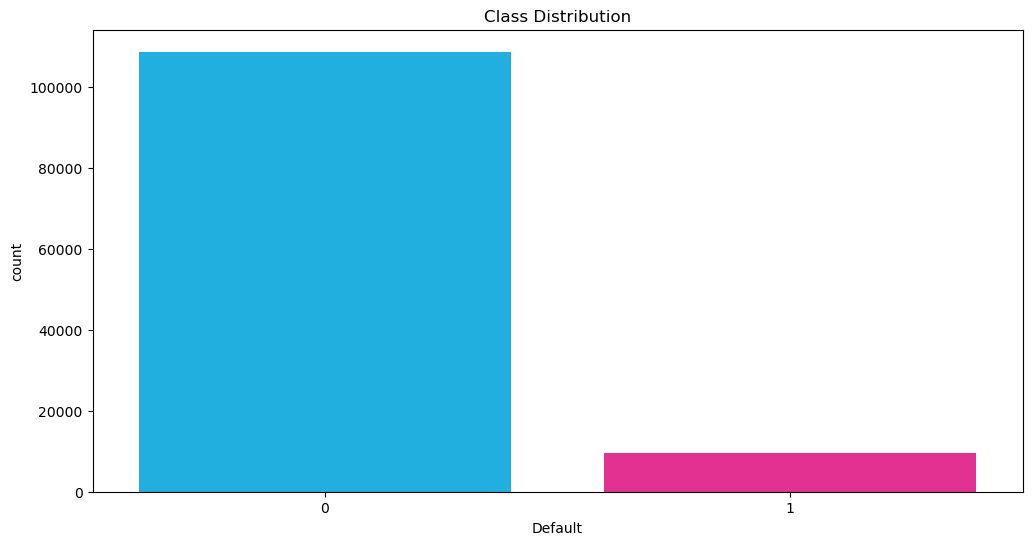

% of no defaults       : 91.90485454960708
Number of no defaults     : 108649
% of defaults         : 8.095145450392916
Number of defaults    : 9570


In [314]:
my_pal = {0: 'deepskyblue', 1: 'deeppink'}

plt.figure(figsize = (12, 6))
ax = sns.countplot(x = 'Default', data = df_al, palette = my_pal)
plt.title('Class Distribution')
plt.show()

# Count and %
Count_Normal_transacation = len(df_al[df_al['Default']==0])
Count_Fraud_transacation = len(df_al[df_al['Default']==1]) 
Percentage_of_Normal_transacation = Count_Normal_transacation/(Count_Normal_transacation+Count_Fraud_transacation)
print('% of no defaults       :', Percentage_of_Normal_transacation*100)
print('Number of no defaults     :', Count_Normal_transacation)
Percentage_of_Fraud_transacation= Count_Fraud_transacation/(Count_Normal_transacation+Count_Fraud_transacation)
print('% of defaults         :',Percentage_of_Fraud_transacation*100)
print('Number of defaults    :', Count_Fraud_transacation)

Text(0.5, 1.0, 'Correlation Matrix')

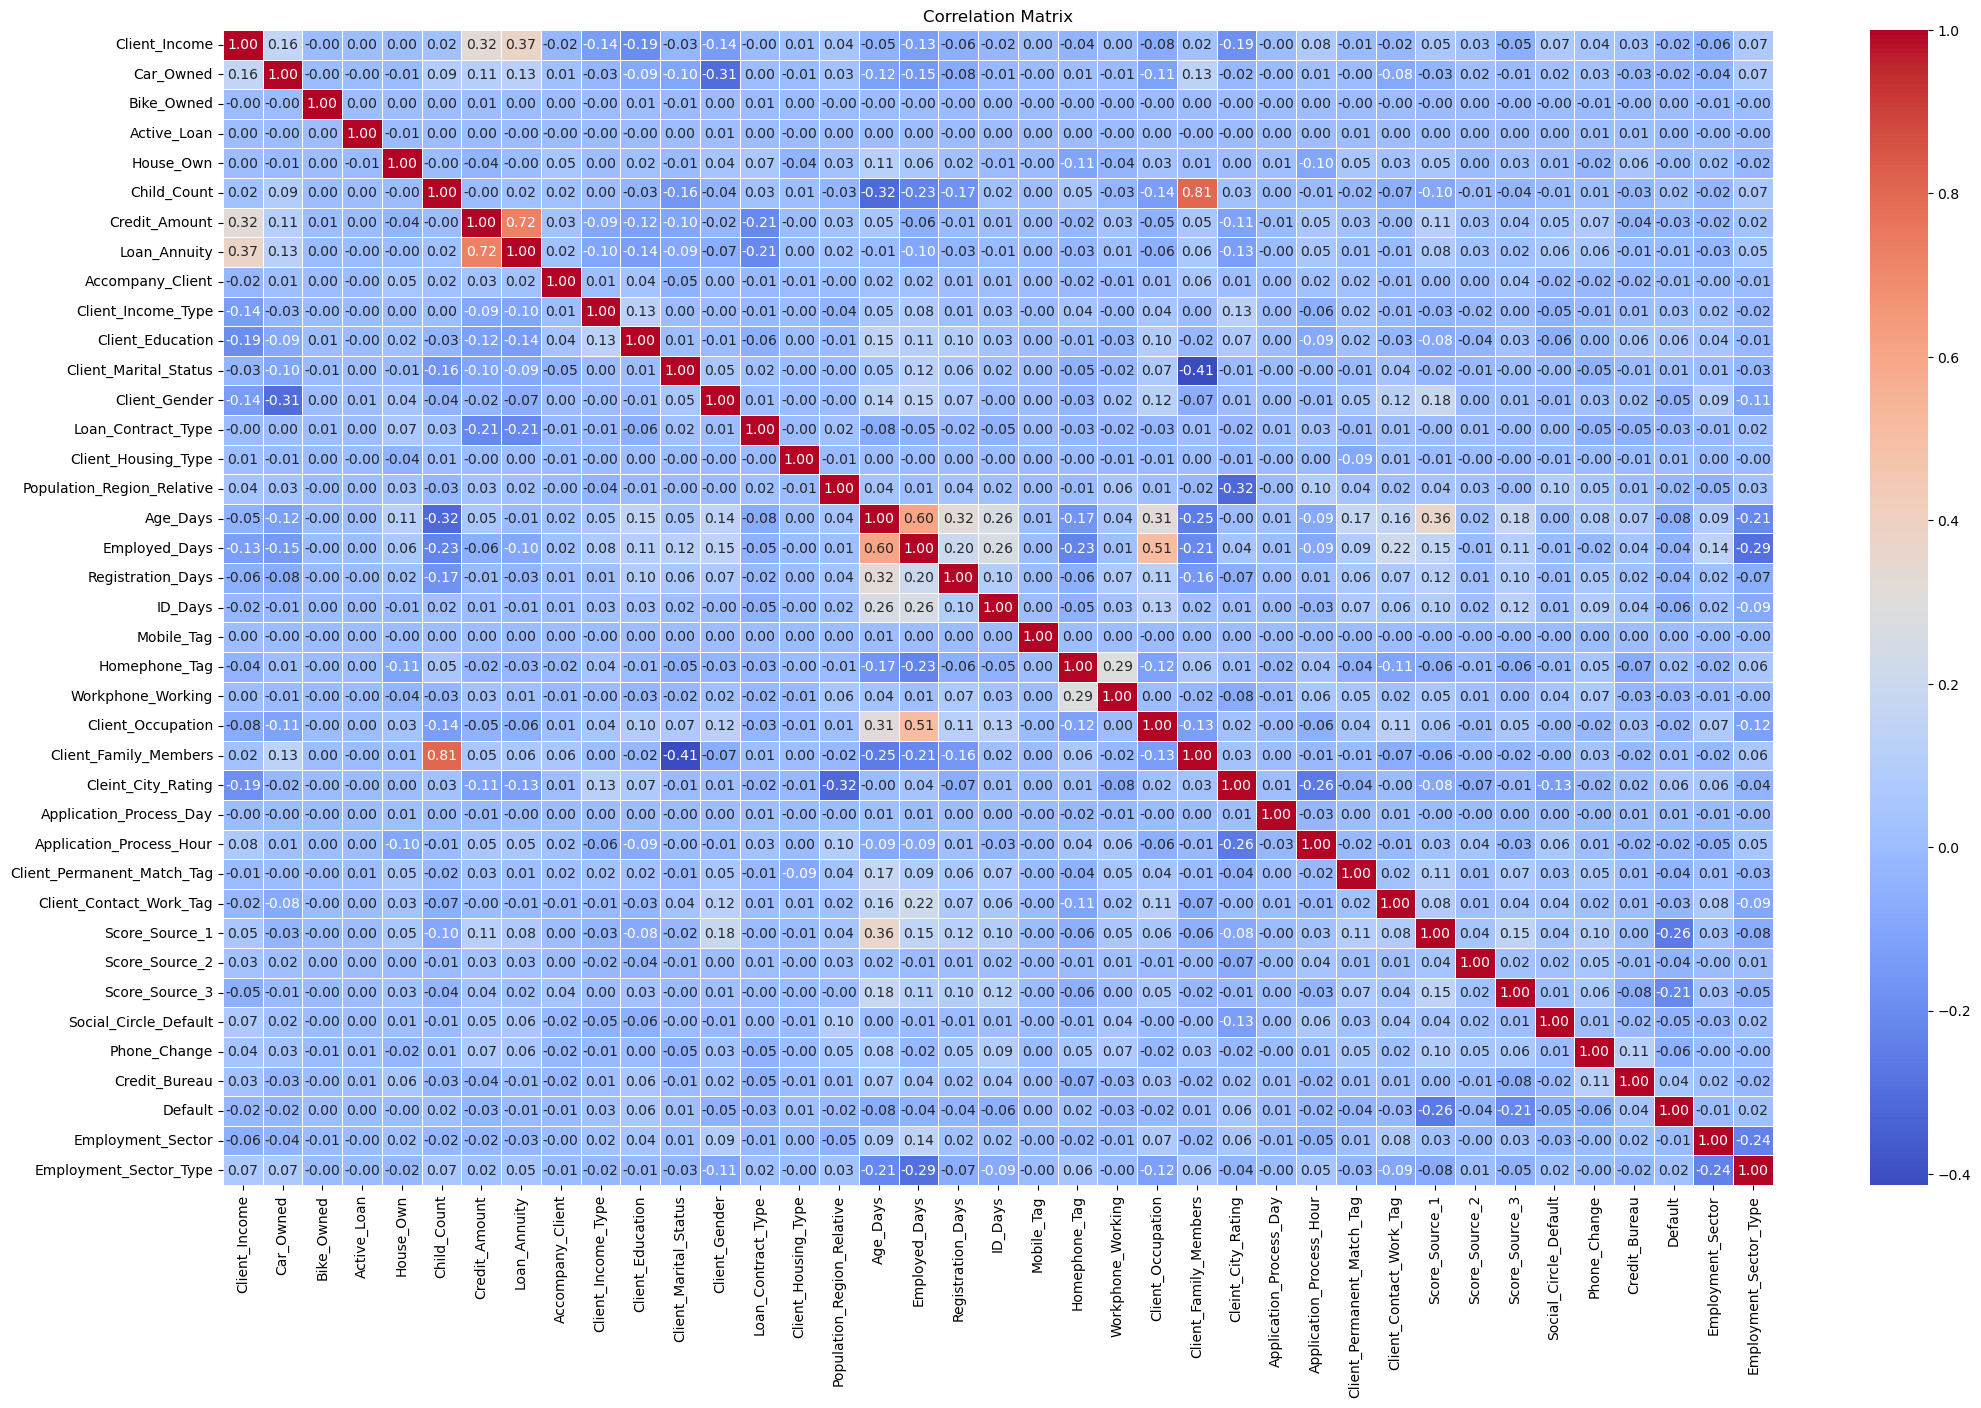

In [315]:
variables = df_al.columns
data = df_al[variables]
correlation_matrix = data.corr()
plt.figure(figsize=(25, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')

In [316]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

X = df_al.drop('Default', axis=1)
y = df_al['Default']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('R2 Score:', r2)

Mean Squared Error: 0.06507335832841481
R2 Score: 0.10261034800239743


In [317]:
ridge_model = Ridge()
ridge_model.fit(X_train,y_train)
ridge_pred = ridge_model.predict(X_test)
ridge_mean_error = mean_squared_error(y_test, ridge_pred)
ridge_r2 = r2_score(y_test, ridge_pred)
print('Mean Squared Error:', ridge_mean_error)
print('R2 Score:', ridge_r2)

Mean Squared Error: 0.06507334913261702
R2 Score: 0.1026104748164115


In [318]:
lasso_model = Lasso()
lasso_model.fit(X_train,y_train)
lasso_pred = lasso_model.predict(X_test)
lasso_mean_error = mean_squared_error(y_test, lasso_pred)
lasso_r2 = r2_score(y_test, lasso_pred)
print('Mean Squared Error:', lasso_mean_error)
print('R2 Score:', lasso_r2)

Mean Squared Error: 0.07252190617968408
R2 Score: -0.00010833650753205859


In [330]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, roc_curve, auc

X = df_al.drop('Default',axis=1)
y = df_al['Default']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
model = LogisticRegression() 
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

scores = cross_val_score(model, X_scaled, y, cv=10)
mean_score = scores.mean()
print("Cros_Validation_Score:", scores)
print("Mean_Score:", mean_score)

report = classification_report(y_test, y_pred)
print(report)

Accuracy: 0.9182456437151074
Cros_Validation_Score: [0.91778041 0.91524277 0.91684994 0.9171037  0.91676535 0.9171037
 0.91744206 0.91718829 0.917865   0.91599695]
Mean_Score: 0.9169338182790947
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     21783
           1       0.40      0.08      0.13      1861

    accuracy                           0.92     23644
   macro avg       0.66      0.54      0.55     23644
weighted avg       0.89      0.92      0.89     23644



Text(50.722222222222214, 0.5, 'True Label')

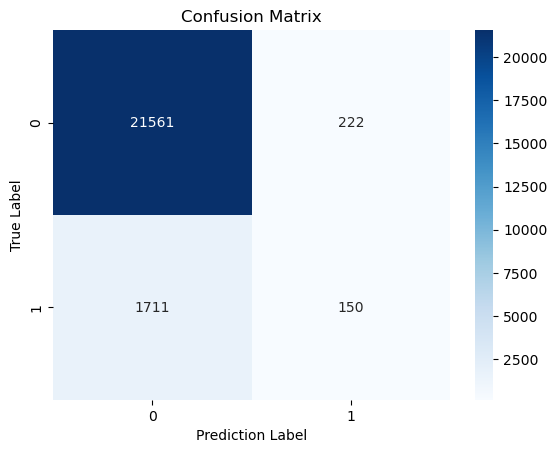

In [331]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Prediction Label")
plt.ylabel("True Label")

Text(0.5, 0, 'False Positive')

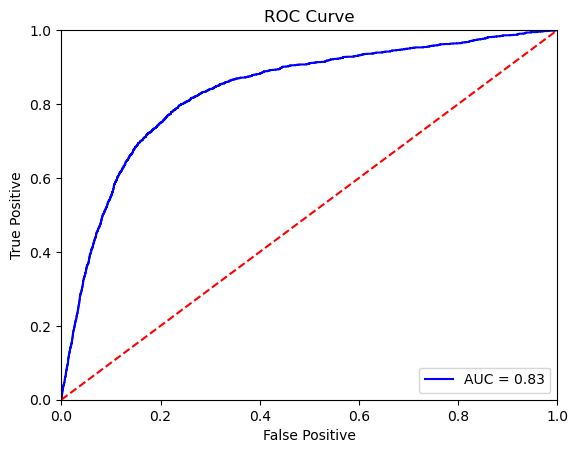

In [321]:
probs = model.predict_proba(X_test)
preds = probs[:, 1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive')
plt.xlabel('False Positive')

Text(0.5, 1.0, 'Modelin Eğitim ve Doğrulama Hatası')

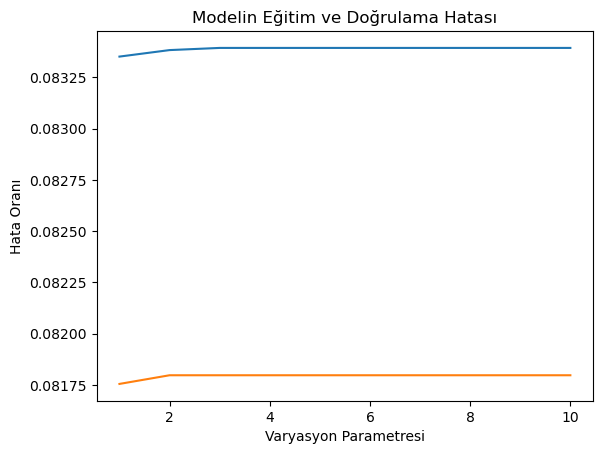

In [322]:
train_errors = []
val_errors = []

for i in range(1, 11): 
    model = LogisticRegression(max_iter=1000, C=i)
    model.fit(X_train, y_train)
    
    train_pred = model.predict(X_train)
    val_pred = model.predict(X_test)
    
    train_error = 1 - accuracy_score(y_train, train_pred)
    val_error = 1 - accuracy_score(y_test, val_pred)
    
    train_errors.append(train_error)
    val_errors.append(val_error)

x = np.arange(1, 11)
plt.plot(x, train_errors, label='Eğitim Hatası')
plt.plot(x, val_errors, label='Doğrulama Hatası')
plt.xlabel('Varyasyon Parametresi')
plt.ylabel('Hata Oranı')
plt.title('Modelin Eğitim ve Doğrulama Hatası')


In [323]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': range(0,20)}
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
print('Best Parameters:', grid_search.best_params_)
print('Best Score:', grid_search.best_score_)

Best Parameters: {'C': 2}
Best Score: 0.9167750462595823
